# Predspracovanie údajov

- Na začiatok si naimportujeme niektoré dôležité knižnice, s ktorými budeme v tejto správe pracovať.

In [130]:
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
import random as rn

- Teraz otvoríme všetky 3 súbory a uložíme ich ako dataframe.

In [301]:
PRODUCT_FILE_PATH = "resources/product.csv"
USER_FILE_PATH = "resources/user.csv"
SESSION_FILE_PATH = "resources/session.csv"

prod_df = pd.read_csv(PRODUCT_FILE_PATH, delimiter='\t')
user_df = pd.read_csv(USER_FILE_PATH, delimiter='\t')
sess_df = pd.read_csv(SESSION_FILE_PATH, delimiter='\t')

## Integrácia a čistenie dát

### Spracovanie chýbajúcich údajov
- V tejto časti sa venujeme nešpecifikovaným hodnotám (NaN). Na spracovanie všetkých 3 datasetov používame funkciu *process_missing_vals(df, limit)*. Táto funkcia spracúva daný dataframe po jednotlivých stĺpcoch. Ak je v danom stĺpci počet hodnôt NaN pod limitom (teda je akceptovateľný), tak sú dané riadky odstránené. Na určenie miery akceptovateľnosti sa používa atribút *limit*, ktorý predstavuje percento akceptovateľnosti. V prípade, že hodnoty sú nad limitom, tak sú nahradené:

    1. __modusom__ (najčastejšia hodnota) v prípade __nenumerických__ dát
    2. __mediánom__ v prípade __numerických__ dát

- Je nutné pripomenúť, že funkcia priamo mení dané datasety, takže pri opätovných pokusoch o spustenie bunky nižšie budú výsledky také, že všetky stĺpce neobsahujú žiadne NaN.

In [302]:
def process_missing_vals(dataframe, limit=1):
    print(f'\nstarting the process...')

    #Here we calculate the actual limit for NaNs which can be dropped
    limit_count = math.ceil((len(dataframe) / 100) * limit)
    print(f'Limit: {limit_count}')
    
    for col in dataframe.columns:
        na_count_before = dataframe[col].isna().sum()

        #If there are no NaNs in the current column, we move to the next one
        if na_count_before == 0:
            print(f"Column '{col}': No NaN values initially.")
            continue

        #If the count of NaNs is acceptable, we remove the rows containing them
        if na_count_before <= limit_count:
            print(f"Column '{col}': Dropping NaN values...")
            dataframe.dropna(subset=[col], inplace=True)
        #else we apply different strategies for numeric and non-numeric data
        else:
            print(f"Column '{col}': Too many NaN values...", end=" ")
            is_numeric = pd.to_numeric(dataframe[col], errors='coerce').notna().all()
            
            if not is_numeric:
                print("Imputing the most common value...")
                most_common_value = dataframe[col].mode()[0]  # Get the most common value
                dataframe[col].fillna(most_common_value, inplace=True)
            else:
                print("Imputing the median value...)")
                median = dataframe[col].median()
                dataframe[col].fillna(median, inplace=True)    
        
        na_count_after = dataframe[col].isna().sum()
        print(f"NaN count before - {na_count_before}, after - {na_count_after}")

    print(f'Process done!\n')

#Processing product dataframe
print("Original Length:", len(prod_df))
process_missing_vals(prod_df)
print("New Length:", len(prod_df))

#Processing user dataframe
print("Original Length:", len(user_df))
process_missing_vals(user_df)
print("New Length:", len(user_df))

#Processing session dataframe
print("Original Length:", len(sess_df))
process_missing_vals(sess_df)
print("New Length:", len(sess_df))

Original Length: 14967

starting the process...
Limit: 150
Column 'location': No NaN values initially.
Column 'product_ean': No NaN values initially.
Column 'store_name': No NaN values initially.
Column 'code': Dropping NaN values...
NaN count before - 22, after - 0
Process done!

New Length: 14945
Original Length: 2533

starting the process...
Limit: 26
Column 'address': Too many NaN values... Imputing the most common value...
NaN count before - 380, after - 0
Column 'name': No NaN values initially.
Column 'race': Too many NaN values... Imputing the most common value...
NaN count before - 1773, after - 0
Column 'registration': No NaN values initially.
Column 'username': No NaN values initially.
Column 'current_location': Too many NaN values... Imputing the most common value...
NaN count before - 127, after - 0
Column 'sex': Too many NaN values... Imputing the most common value...
NaN count before - 1266, after - 0
Column 'birthdate': Too many NaN values... Imputing the most common val

- Teraz sa môžme ísť pozrieť na výsledky spracovávania. Vidno, že súbor s produktami mal najmenej nešpecifikovaných hodnôt, a to len 22 v prípade atribútu code. Keďže ide o zanedbateľné množstvo, tak boli tieto hodnoty odstránené. V prípade __datasetu s používateľmi__, tak tam bolo naopak najviac nešpecifikovaných hodnôt. Vždy bol prekročený aj limit akceptovateľnosti, takže žiadny riadok nebol v tomto prípade odstránený, ale nahradený najčastejšou hodnotou, nakoľko išlo o nenumerické dáta. V prípade posledného súboru išlo vždy o zanedbateľné množstvá NaN hodnôt, takže všetky boli odstránené.
- Nižšie sme si zadefinovali funkcie na zobrazovenie distribúcií rozdelení na grafoch. Nižšie vypisujeme niektoré zaujímavé prípady.

In [144]:
def plt_dis(df, name = 'unknown', bar_limit = 25):
    counts = df.value_counts().head(bar_limit)

    colors = ['Red', 'Blue', 'Green', 'Black', 'Yellow', 'Orange', 'Purple', 'Pink']
    rn.shuffle(colors)
    
    counts.plot(kind='bar', color=colors, alpha=1)
    plt.ylim(0, max(counts) + 10*(max(counts)/100))
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f"'{name}' distribution")
    plt.show()

def plt_table_dis(df, bar_limit = 25):
    
    for col in df:
        plot_distribution(df[col], col)

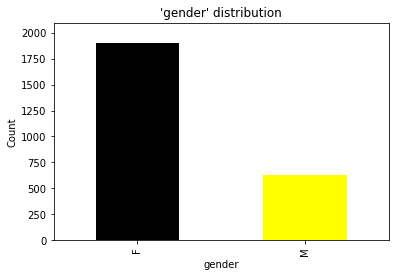

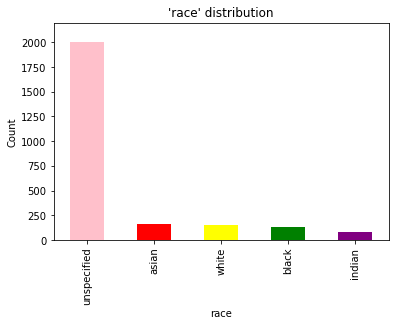

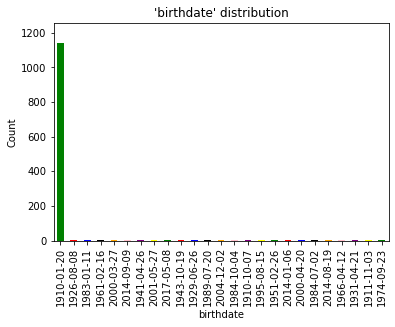

In [149]:
#plt_table_dis(user_df)

plt_dis(user_df['sex'], 'gender')
plt_dis(user_df['race'], 'race')
plt_dis(user_df['birthdate'], 'birthdate')

- Dané distribúcie pochádzajú z datasetu užívateľov, ktorý súčasne obsahuje najväčší výskyt nešpecifikovaných hodnôt. V prvom grafe vidíme, že v prípade pohlaví je teraz oveľa viac zastúpené ženské pohlavie, pretože to bolo v pôvodnom datasete najčastejšie sa vyskytujúca hodnota. V druhom prípade sa to isté uplatnilo na atribút 'unspecified', čo je ale tentokrát lepšie, pretože žiadna hodnota nie je nadmerne preferovaná. Najhorší prípade je posledný, kedy obrovkské množstvo nešpecifikovaných hodnôt preferuje hodnotu modus. Stále sme ale aspoň neprišli o veľké množstvo dát, ak by sme tieto hodnoty vypustili z datasetu.

### Spracovanie vychýlených hodnôt
- V tejto časti spracovávame významne vychýlené dáta, tzv. __outliers__, tak, že ich buď:

  1) __odstránime__, ak ide o zadedbateľné množstvo, inak
  2) __nahradíme hraničnou hodnotou__

- Najskôr si pre otestovanie, či náš systém spracovávania takýchto hodnôt funguje správne, vytvoríme niekoľko pomocných funkcií definovaných nižšie. Najdôležitejšia je v tomto prípade funkcia _top_outlier_data(df, limit)_, ktorá identifikuje stĺpce s najväčším počtom outlier-ov na základe atribútu _limit_. Následne vypíše ich distribúcie pomocou BoxPlot-ov, v ktorých sú zobrazené dané outlier-y.

Column 'browser_name': Not numerical! Skipping...
Column 'session_start': Not numerical! Skipping...
Column 'screen_width': Not numerical! Skipping...
Column 'screen_height': Not numerical! Skipping...


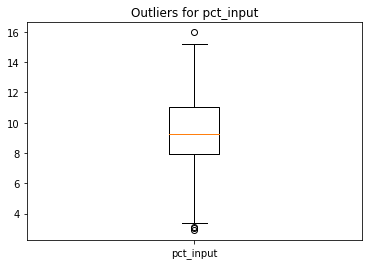

Outliers: 179


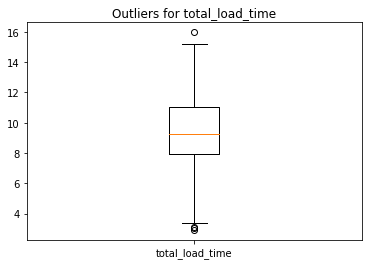

Outliers: 171


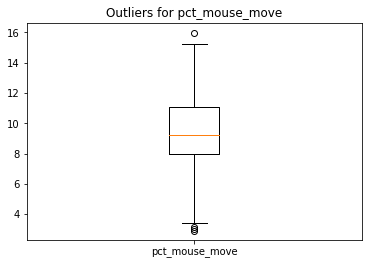

Outliers: 89


In [303]:
def plt_outliers(df, name='unknown'):    
    if not pd.to_numeric(df, errors='coerce').notna().all():
        print("Detected non-numerical data!")
        return
    
    plt.boxplot(sess_df['wild_mouse_duration'], labels=[name])
    plt.title(f"Outliers for {name}")
    plt.show()

def plt_table_outliers(df):
    for col in df:
        plt_outliers(df[col], col)

def top_outlier_data(df, limit = 3):
    max = []
    
    for col in df:
        if not pd.to_numeric(df[col], errors='coerce').notna().all():
            print(f"Column '{col}': Not numerical! Skipping...")
            continue

        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers = len(df[col][abs(z_scores) > threshold])
        
        if outliers > 0:
            if len(max) == 0 or len(max) < limit:
                max.append({'col': col, 'outliers': outliers})
                continue

            remove = -1
            rate = -1
            for i in range(0, limit):
                if max[i]['outliers'] < outliers and (rate == -1 or outliers - max[i]['outliers'] > rate):
                    remove = i
                    rate = outliers - max[i]['outliers']

            if remove > -1:
                max[remove] = {'col': col, 'outliers': outliers}

    #for m in max:
      #  plt_outliers(df[m['col']], m['col'])
       # print(f"Counts: {m['outliers']}")

    return max
            
    

#plt_table_outliers(sess_df)
top_outliers = top_outlier_data(sess_df)

for o in top_outliers:
    plt_outliers(sess_df[o['col']], o['col'])
    print(f"Outliers: {o['outliers']}")

#plt_outliers(sess_df['wild_mouse_duration'], 'wild_mouse_duration')

- Identifikovali sme 3 distribúcie s najväčším počtom vychýlených hodnôt. Aj tie teraz spracujeme pomocou funkcie _process_outliers()_ a otestujeme, či dané outlier-y sú skutočne preč.

In [315]:
sess_df = pd.read_csv(SESSION_FILE_PATH, delimiter='\t')
process_missing_vals(sess_df)

def process_outliers(df, limit = 1, threshold=3):
    print("\nStarting process...")

    for col in df.columns:
        is_numeric = pd.to_numeric(df[col], errors='coerce').notna().all()

        if not is_numeric:
            print(f"Column '{col}': Not numerical! Skipping...")
            continue

        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers_mask = abs(z_scores) > threshold
        outliers_c = outliers_mask.sum()
        print(f"Column '{col}': Detected {outliers_c} outliers! Processing...", end=" ")
        
        if outliers_c <= math.ceil((len(df)/100) * limit):
            print(f"Removing outliers...")
            df = df.loc[~outliers_mask]
        else:
            print(f"Replacing with a limit value...")
            p5 = df[col].quantile(0.05)
            p95 = df[col].quantile(0.95)

            p5 = df[col].quantile(0.05)
            p95 = df[col].quantile(0.95)
            
            df.loc[df[col] > p95, col] = p95
            df.loc[df[col] < p5, col] = p5
            
        print(f"Remaining rows after removing outliers: {len(df)}")

    print("Ending process...\n")

    return df

sess_df = process_outliers(sess_df)


starting the process...
Limit: 111
Column 'browser_name': No NaN values initially.
Column 'pct_input': Dropping NaN values...
NaN count before - 11, after - 0
Column 'wild_mouse_duration': Dropping NaN values...
NaN count before - 11, after - 0
Column 'pct_scroll_move_duration': Dropping NaN values...
NaN count before - 11, after - 0
Column 'pct_wild_mouse': Dropping NaN values...
NaN count before - 11, after - 0
Column 'session_start': No NaN values initially.
Column 'pct_doubleclick': Dropping NaN values...
NaN count before - 11, after - 0
Column 'pct_rage_click': Dropping NaN values...
NaN count before - 11, after - 0
Column 'pct_click': Dropping NaN values...
NaN count before - 11, after - 0
Column 'page_activity_duration': Dropping NaN values...
NaN count before - 11, after - 0
Column 'product_ean': No NaN values initially.
Column 'pct_scrandom': Dropping NaN values...
NaN count before - 10, after - 0
Column 'mouse_move_total_rel_distance': Dropping NaN values...
NaN count before

- Vyššie možno vidieť výpis zo spracovania vychýlených hodnôt. Funkcia na spracovanie pracovala tak, že tam, kde bol výskyt outlier-ov pod 1 percento, tak tam boli tieto dáta odstránené, inak ale boli nahradené hraničnou hodnotou. Druhý prípad bol realizovaný tak, že hodnoty nad 95-tným kvantilom boli nahradené hodnotou na 95 percentnom kvantile. Podobne to boli aj s hodnotami pod 5 percentným kvantilom.

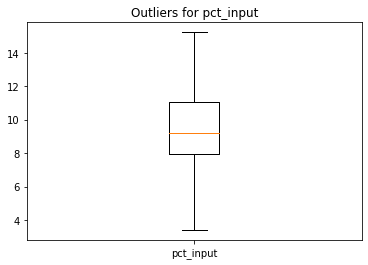

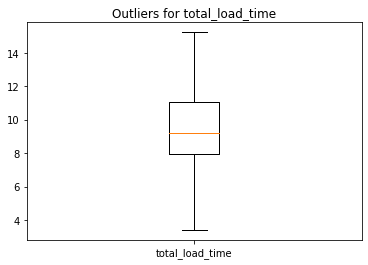

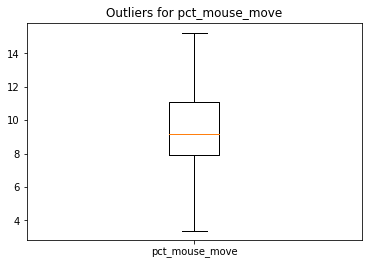

In [316]:
for o in top_outliers:
    plt_outliers(sess_df[o['col']], o['col'])

- Z grafov vidno, že outlier-y boli z testovacích datasetov úspešne odstránené. 